In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Mobile phone price.csv')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [13]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [14]:
df.shape

(407, 8)

In [15]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [16]:
df.columns.tolist()

['Brand',
 'Model',
 'Storage ',
 'RAM ',
 'Screen Size (inches)',
 'Camera (MP)',
 'Battery Capacity (mAh)',
 'Price ($)']

In [17]:
drop_col=['Model','Camera (MP)','Screen Size (inches)']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Brand,Storage,RAM,Price ($)
0,Apple,128 GB,6 GB,999
1,Samsung,256 GB,12 GB,1199
2,OnePlus,128 GB,8 GB,899
3,Xiaomi,128 GB,6 GB,279
4,Google,128 GB,8 GB,799
...,...,...,...,...
402,Samsung,128,8,1049
403,Xiaomi,128,6,349
404,Apple,128,6,1099
405,Oppo,128,8,429


In [18]:
df['Price ($)'].unique()


array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '1999', '119', '319',
       '1049'], dtype=object)

In [19]:
df['Price ($)'] = df['Price ($)'].str.replace('$', '').str.replace(',', '').str.strip()
df['Price ($)'] = pd.to_numeric(df['Price ($)'])
df['Price ($)'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049], dtype=int64)

In [20]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Brand':
['Apple' 'Samsung' 'OnePlus' 'Xiaomi' 'Google' 'Oppo' 'Vivo' 'Realme'
 'Motorola' 'Nokia' 'Sony' 'LG' 'Asus' 'Blackberry' 'CAT' 'Huawei']

Unique values in 'Storage ':
['128 GB' '256 GB' '64 GB' '32 GB' '128GB' '256GB' '64GB' '32GB' '256'
 '64' '128' '512' '32']

Unique values in 'RAM ':
['6 GB' '12 GB' '8 GB' '4 GB' '3 GB' '2 GB' '4GB' '8GB' '6GB' '12GB' '3GB'
 '2GB' '5GB' '12' '3' '6' '8' '4' '16' '2']

Unique values in 'Price ($)':
[ 999 1199  899  279  799  249  699  329  449  199  299  379  179  729
  599  139  189  399  259  159  229  499  129  529  369 1099  169   99
  459  239 1299  429  659  269  359  549  319  349  969  149  219  109
  389  309  849  469  209  119  339  289  130  749  649  419 1399 1999
 1049]



In [21]:
df['Storage '] = df['Storage '].str.replace('GB', '').str.strip()
df['Storage '] = pd.to_numeric(df['Storage '])

In [22]:
df['RAM '] = df['RAM '].str.replace('GB', '').str.strip()
df['RAM '] = pd.to_numeric(df['RAM '])

In [23]:
print(df['Storage '].unique())
print(df['RAM '].unique())

[128 256  64  32 512]
[ 6 12  8  4  3  2  5 16]


In [24]:
object_columns = df.select_dtypes(include = 'object').columns
df[object_columns]

,Brand
0,Apple
1,Samsung
2,OnePlus
3,Xiaomi
4,Google
...,...
402,Samsung
403,Xiaomi
404,Apple
405,Oppo


In [25]:
df1 = pd.get_dummies(df, columns=object_columns)
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128,6,3095,999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,256,12,5000,1199,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,128,8,4500,899,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,128,6,5020,279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,128,8,4614,799,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128,8,4300,1049,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,128,6,4160,349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,128,6,3687,1099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,128,8,4025,429,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Storage                 407 non-null    int64
 1   RAM                     407 non-null    int64
 2   Battery Capacity (mAh)  407 non-null    int64
 3   Price ($)               407 non-null    int64
 4   Brand_Apple             407 non-null    bool 
 5   Brand_Asus              407 non-null    bool 
 6   Brand_Blackberry        407 non-null    bool 
 7   Brand_CAT               407 non-null    bool 
 8   Brand_Google            407 non-null    bool 
 9   Brand_Huawei            407 non-null    bool 
 10  Brand_LG                407 non-null    bool 
 11  Brand_Motorola          407 non-null    bool 
 12  Brand_Nokia             407 non-null    bool 
 13  Brand_OnePlus           407 non-null    bool 
 14  Brand_Oppo              407 non-null    bool 
 15  Brand_Realme           

In [27]:
from sklearn.preprocessing import MinMaxScaler

non_boolean_numerical_features = ['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])

In [28]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [29]:
y_scaled = df1['Price ($)']
y_scaled

0      0.473684
1      0.578947
2      0.421053
3      0.094737
4      0.368421
         ...   
402    0.500000
403    0.131579
404    0.526316
405    0.173684
406    0.289474
Name: Price ($), Length: 407, dtype: float64

In [30]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [31]:
x = df1.drop(['Price ($)'],axis=1)

In [32]:
x

,Storage,RAM,Battery Capacity (mAh),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [33]:
df1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size = 0.855, random_state = 42)


In [35]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [37]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.002428325939615368
Testing MSE: 0.006837514568761031
Training R2 Score: 0.904047796643253
Testing R2 Score: 0.7234781087801413


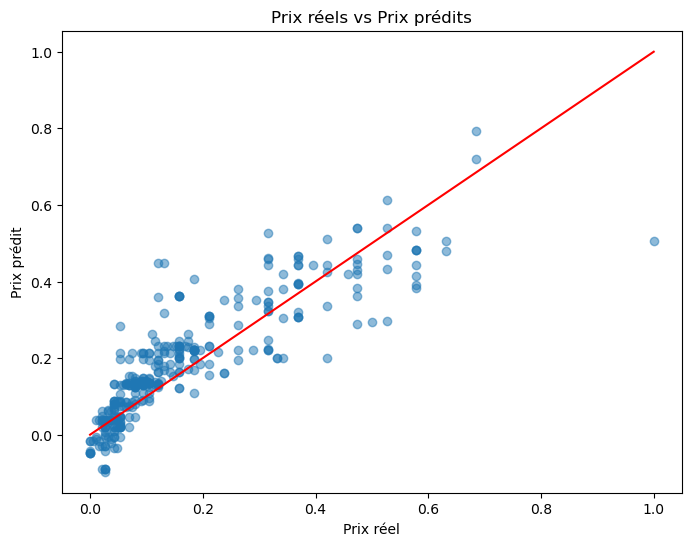

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Prix réels vs Prix prédits")
plt.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], color='red')  # ligne diagonale
plt.show()

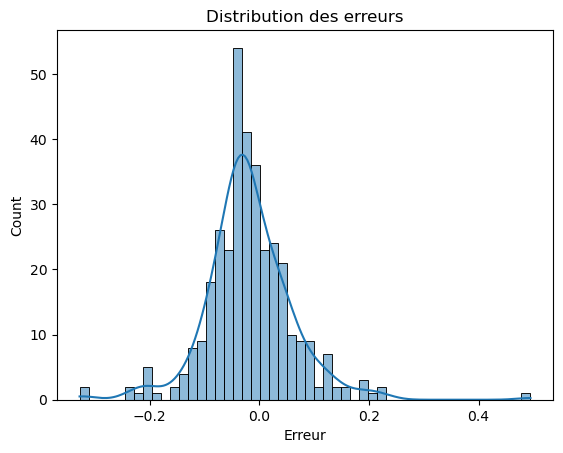

In [39]:
errors = y_test - y_pred_test
sns.histplot(errors, bins=50, kde=True)
plt.title("Distribution des erreurs")
plt.xlabel("Erreur")
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# --- Charger les données ---
df = df1

# --- Renommer les colonnes (enlever espaces) ---
df.columns = df.columns.str.strip()

# --- Sélection des colonnes utiles ---
features = ['Storage', 'RAM', 'Battery Capacity (mAh)']
target = 'Price ($)'

X = df[features]
y = df[target]

# --- Normalisation ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# --- Split et entraînement ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# --- Sauvegarde du modèle ---
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(features, "features.pkl")


['features.pkl']